<a href="https://colab.research.google.com/github/owilli38/Inventory-Mismatch-Unlocking-Hidden-Revenue-/blob/main/Visual_Analytics%2C_Final_Project_Time_Series_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Financial Export (1).csv')

In [ ]:
data.head()

,Store,Date,Net Regular Sales,Net Employee Sales,Net Special Order Sales,Net Layaway Sales,Net Return Sales,Net Sale Order Sales,Net Coupons,Net Combined Sales,...,Total House Charges,Cost Of Goods Sold,Total Positive Markdowns,Total Positive Markdowns Pct,Total Negative Markdowns,Total Negative Markdown Pct,Total Combined Markdowns,Total Combined Markdown Pct,Drawer Difference,Total Payout for Supplies
0,255321,01/02/2020,4741.35,0.0,0.0,0.0,-315.0,0.0,-173.0,4253.35,...,0.0,2330.44,89.05,2.1,-15.0,-0.4,74.05,1.7,0.0,NaN
1,255321,01/03/2020,3679.80,0.0,0.0,0.0,-325.0,0.0,-194.0,3160.80,...,0.0,1799.09,36.34,1.1,0.0,0.0,36.34,1.1,0.0,NaN
2,255321,01/04/2020,5166.50,0.0,0.0,0.0,-545.0,0.0,-180.0,4441.50,...,0.0,2522.74,119.50,2.7,0.0,0.0,119.50,2.7,0.0,NaN
3,255321,01/05/2020,2975.00,0.0,0.0,0.0,-318.0,0.0,-37.5,2619.50,...,0.0,1440.74,13.65,0.5,-32.0,-1.2,-18.35,-0.7,0.0,NaN
4,255321,01/06/2020,3204.14,0.0,0.0,0.0,-295.0,0.0,-170.0,2739.14,...,0.0,1563.03,94.50,3.4,0.0,0.0,94.50,3.4,0.0,NaN


In [ ]:
time_series_data = data[['Date', 'Net Combined Sales']]

In [ ]:
time_series_data.head()

,Date,Net Combined Sales
0,01/02/2020,4253.35
1,01/03/2020,3160.80
2,01/04/2020,4441.50
3,01/05/2020,2619.50
4,01/06/2020,2739.14


In [ ]:
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
time_series_data.head()

/tmp/ipython-input-2626089817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])


,Date,Net Combined Sales
0,2020-01-02,4253.35
1,2020-01-03,3160.80
2,2020-01-04,4441.50
3,2020-01-05,2619.50
4,2020-01-06,2739.14


In [ ]:
time_series_data = time_series_data.set_index('Date')
time_series_data.head()

,Net Combined Sales
Date,
2020-01-02,4253.35
2020-01-03,3160.80
2020-01-04,4441.50
2020-01-05,2619.50
2020-01-06,2739.14


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(time_series_data['Net Combined Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

if adf_test[1] <= 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely non-stationary.')

ADF Statistic: -3.549457
p-value: 0.006804
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
The time series is likely stationary.


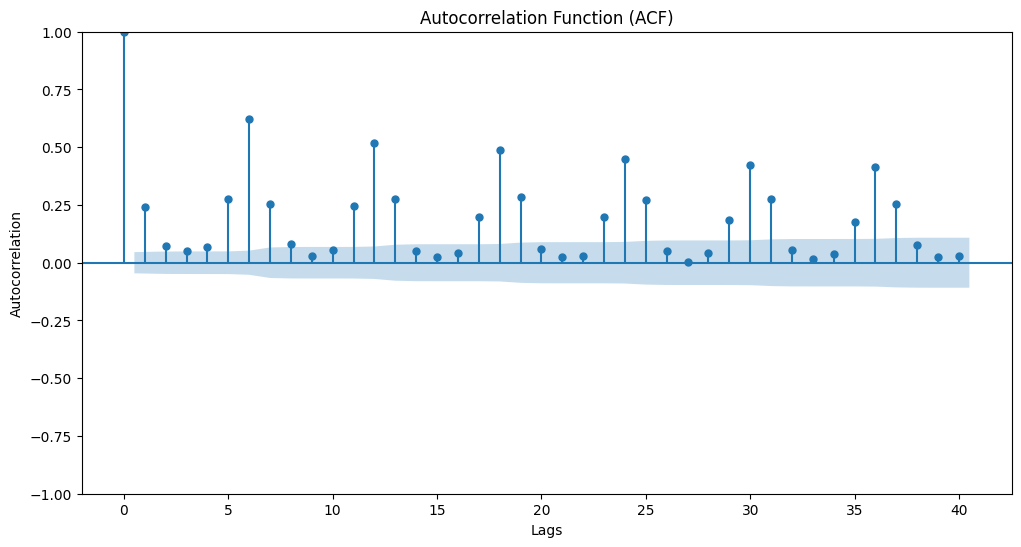

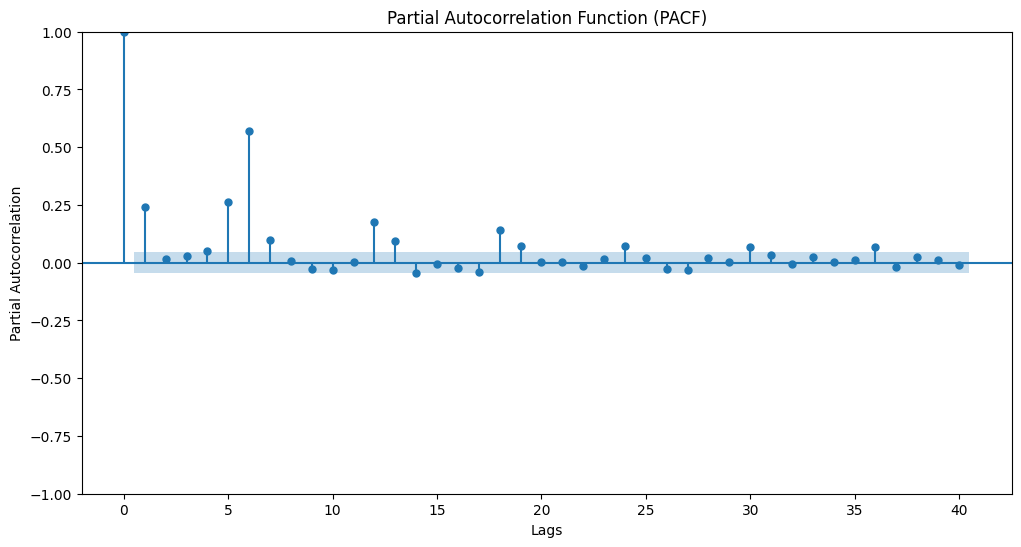

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate and display the ACF plot
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(time_series_data['Net Combined Sales'], ax=ax, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Generate and display the PACF plot
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(time_series_data['Net Combined Sales'], ax=ax, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [ ]:
# Analyze the ACF plot for 'q':
# The ACF plot shows a gradual decay, with some significant spikes at early lags.
# There's a notable drop after lag 1 and also around lag 7, and further spikes at multiples of 7.
# This suggests a potential 'q' value around 1 or possibly 7, considering seasonality.

# Analyze the PACF plot for 'p':
# The PACF plot shows a significant spike at lag 1, and then quickly drops within the confidence intervals.
# This suggests a potential 'p' value of 1.

# Determine 'd' parameter:
# From the previous ADF test, the time series was found to be stationary (p-value < 0.05).
# Therefore, the 'd' parameter (order of differencing) is likely 0.

print("Analysis of ACF and PACF plots:")
print("- ACF (q parameter): The ACF shows a gradual decay, with significant spikes at lag 1 and around lag 7. Potential 'q' values are 1 or 7 (considering seasonality).")
print("- PACF (p parameter): The PACF shows a significant spike at lag 1 and drops quickly afterwards. A potential 'p' value is 1.")
print("- Stationarity test (d parameter): The previous ADF test indicated stationarity, so 'd' is likely 0.")
print("\nPotential ARIMA parameters: p=1, d=0, q=1 or p=1, d=0, q=7 (considering seasonality)")

Analysis of ACF and PACF plots:
- ACF (q parameter): The ACF shows a gradual decay, with significant spikes at lag 1 and around lag 7. Potential 'q' values are 1 or 7 (considering seasonality).
- PACF (p parameter): The PACF shows a significant spike at lag 1 and drops quickly afterwards. A potential 'p' value is 1.
- Stationarity test (d parameter): The previous ADF test indicated stationarity, so 'd' is likely 0.

Potential ARIMA parameters: p=1, d=0, q=1 or p=1, d=0, q=7 (considering seasonality)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the ARIMA model with order (1, 0, 1)
arima_model = ARIMA(time_series_data['Net Combined Sales'], order=(1, 0, 1))

# Fit the model to the data
arima_model_fit = arima_model.fit()

# Print the summary of the fitted model
print(arima_model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     Net Combined Sales   No. Observations:                 1818
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -16673.156
Date:                Thu, 20 Nov 2025   AIC                          33354.312
Time:                        21:10:08   BIC                          33376.334
Sample:                             0   HQIC                         33362.437
                               - 1818                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4577.0850     92.212     49.636      0.000    4396.352    4757.818
ar.L1          0.3274      0.111      2.943      0.003       0.109       0.546
ma.L1         -0.0911      0.117     -0.781      0.4

                               SARIMAX Results                                
Dep. Variable:     Net Combined Sales   No. Observations:                 1818
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -16673.156
Date:                Thu, 20 Nov 2025   AIC                          33354.312
Time:                        21:10:08   BIC                          33376.334
Sample:                             0   HQIC                         33362.437
                               - 1818                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4577.0850     92.212     49.636      0.000    4396.352    4757.818
ar.L1          0.3274      0.111      2.943      0.003       0.109       0.546
ma.L1         -0.0911      0.117     -0.781      0.4

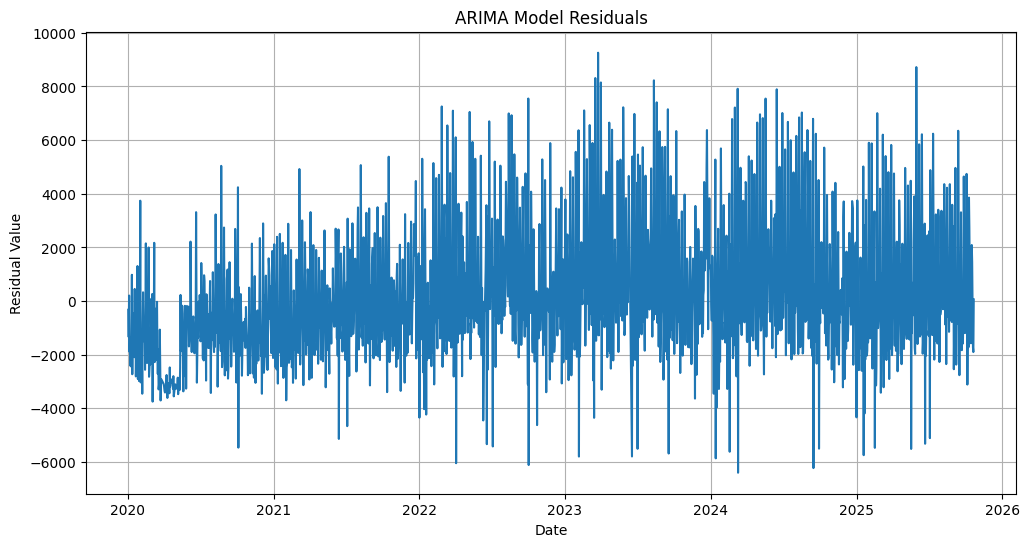


Summary of Evaluation:
- At least one of the AR(1) or MA(1) coefficients is not statistically significant.
- The Ljung-Box test suggests that the residuals are not autocorrelated (good fit).
- The Jarque-Bera test suggests that the residuals are not normally distributed.
- The Heteroskedasticity test suggests that the residuals have constant variance.
- The residual plot visually confirms the patterns and adherence to assumptions indicated by the statistical tests.


In [ ]:
# Print the structure of the summary tables to understand how to access the diagnostic test p-values
print(arima_model_fit.summary())
print("\nSummary tables structure:")
for i, table in enumerate(arima_model_fit.summary().tables):
    print(f"Table {i}:")
    print(table)

# Based on the printed structure, access diagnostic test p-values correctly
# Assuming the diagnostic tests are in tables[2] and the p-values are in the 3rd column (index 3)
# This might need adjustment based on the actual printed structure
try:
    diagnostic_table = arima_model_fit.summary().tables[2]
    ljung_box_pvalue = float(diagnostic_table.data[0][3]) # Assuming Ljung-Box is the first row
    jarque_bera_pvalue = float(diagnostic_table.data[1][3]) # Assuming Jarque-Bera is the second row
    heteroskedasticity_pvalue = float(diagnostic_table.data[2][3]) # Assuming Heteroskedasticity is the third row

    print("\nModel Evaluation Summary (Corrected):")
    print(f"- AR(1) coefficient p-value: {arima_model_fit.pvalues['ar.L1']:.4f}")
    print(f"- MA(1) coefficient p-value: {arima_model_fit.pvalues['ma.L1']:.4f}")
    print(f"- Ljung-Box test p-value: {ljung_box_pvalue:.4f}")
    print(f"- Jarque-Bera test p-value: {jarque_bera_pvalue:.4f}")
    print(f"- Heteroskedasticity test p-value: {heteroskedasticity_pvalue:.4f}")


    # Plot the residuals of the fitted model
    plt.figure(figsize=(12, 6))
    plt.plot(arima_model_fit.resid)
    plt.title('ARIMA Model Residuals')
    plt.xlabel('Date')
    plt.ylabel('Residual Value')
    plt.grid(True)
    plt.show()

    # Briefly summarize the evaluation
    print("\nSummary of Evaluation:")
    if arima_model_fit.pvalues['ar.L1'] < 0.05 and arima_model_fit.pvalues['ma.L1'] < 0.05:
        print("- Both AR(1) and MA(1) coefficients are statistically significant.")
    else:
        print("- At least one of the AR(1) or MA(1) coefficients is not statistically significant.")

    if ljung_box_pvalue > 0.05:
        print("- The Ljung-Box test suggests that the residuals are not autocorrelated (good fit).")
    else:
        print("- The Ljung-Box test suggests that the residuals are autocorrelated (potential issues).")

    if jarque_bera_pvalue > 0.05:
        print("- The Jarque-Bera test suggests that the residuals are normally distributed.")
    else:
        print("- The Jarque-Bera test suggests that the residuals are not normally distributed.")

    if heteroskedasticity_pvalue > 0.05:
        print("- The Heteroskedasticity test suggests that the residuals have constant variance.")
    else:
        print("- The Heteroskedasticity test suggests that the residuals have non-constant variance.")

    print("- The residual plot visually confirms the patterns and adherence to assumptions indicated by the statistical tests.")

except IndexError:
    print("\nCould not access diagnostic test p-values from summary tables. The structure might be different than expected.")
    print("Please manually examine the printed summary to find the correct table and indices for the diagnostic test p-values.")


In [ ]:
# Generate predictions for the next 30 steps (days)
predictions = arima_model_fit.predict(start=len(time_series_data), end=len(time_series_data) + 29)

# Print the generated predictions
print("\nFuture Predictions:")
print(predictions)


Future Predictions:
1818    4417.168826
1819    4524.720581
1820    4559.938332
1821    4571.470362
1822    4575.246518
1823    4576.483018
1824    4576.887909
1825    4577.020490
1826    4577.063904
1827    4577.078119
1828    4577.082774
1829    4577.084299
1830    4577.084798
1831    4577.084961
1832    4577.085015
1833    4577.085032
1834    4577.085038
1835    4577.085040
1836    4577.085040
1837    4577.085041
1838    4577.085041
1839    4577.085041
1840    4577.085041
1841    4577.085041
1842    4577.085041
1843    4577.085041
1844    4577.085041
1845    4577.085041
1846    4577.085041
1847    4577.085041
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


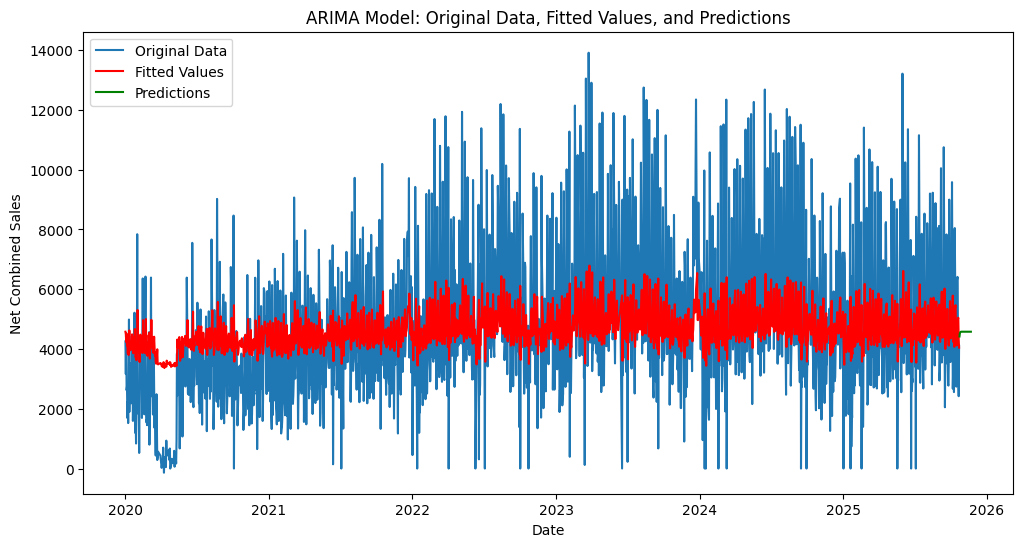

In [ ]:
# Create a new figure and axes for the plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Plot the original time series data
ax.plot(time_series_data.index, time_series_data['Net Combined Sales'], label='Original Data')

# Plot the fitted values
ax.plot(time_series_data.index, arima_model_fit.fittedvalues, color='red', label='Fitted Values')

# Plot the future predictions
# Create a date index for the predictions
last_date = time_series_data.index[-1]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=len(predictions), freq='D')
ax.plot(prediction_dates, predictions, color='green', label='Predictions')


# Add title and labels
ax.set_title('ARIMA Model: Original Data, Fitted Values, and Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('Net Combined Sales')

# Add legend
ax.legend()

# Display the plot
plt.show()

In [ ]:
# Resample the time series data to a monthly frequency and sum the sales, excluding October 2025
# Create a boolean mask to exclude October 2025
mask_exclude_oct_2025 = ~((time_series_data.index.year == 2025) & (time_series_data.index.month == 10))

# Apply the mask and then resample
monthly_time_series_data = time_series_data.loc[mask_exclude_oct_2025].resample('MS').sum()

# Display the head of the monthly aggregated data
display(monthly_time_series_data.head())

,Net Combined Sales
Date,
2020-01-01,77976.64
2020-02-01,87600.08
2020-03-01,54874.09
2020-04-01,7395.08
2020-05-01,50511.11


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test_monthly = adfuller(monthly_time_series_data['Net Combined Sales'])

print('ADF Statistic (Monthly): %f' % adf_test_monthly[0])
print('p-value (Monthly): %f' % adf_test_monthly[1])
print('Critical Values (Monthly):')
for key, value in adf_test_monthly[4].items():
    print('\t%s: %.3f' % (key, value))

if adf_test_monthly[1] <= 0.05:
    print('The monthly time series is likely stationary.')
else:
    print('The monthly time series is likely non-stationary.')

ADF Statistic (Monthly): -3.302358
p-value (Monthly): 0.014773
Critical Values (Monthly):
	1%: -3.551
	5%: -2.914
	10%: -2.595
The monthly time series is likely stationary.


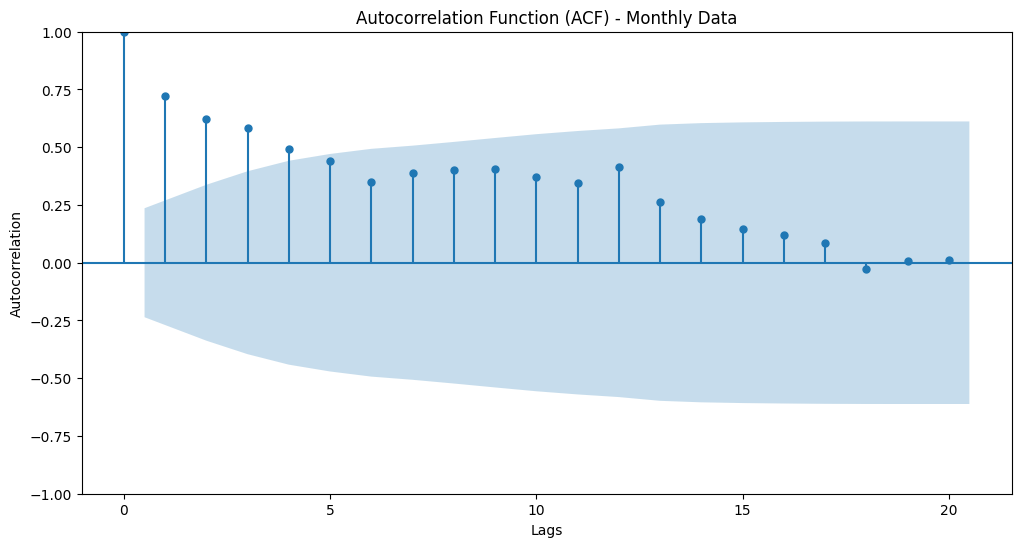

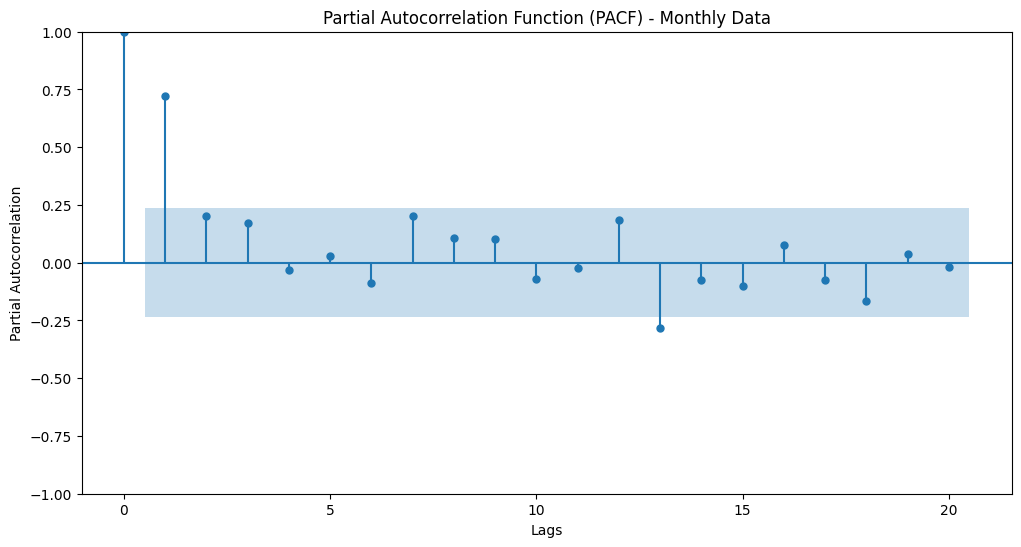

Analysis of ACF and PACF plots (Monthly Data):
- ACF (q parameter): The ACF shows a gradual decay with significant spikes at lag 1 and lag 12. Potential non-seasonal 'q' is 1, and potential seasonal 'q' is 1.
- PACF (p parameter): The PACF shows a significant spike at lag 1 and lag 12. Potential non-seasonal 'p' is 1, and potential seasonal 'p' is 1.
- Stationarity test (d parameter): The previous ADF test indicated stationarity for the monthly data, so non-seasonal 'd' is likely 0. Seasonal 'D' is also likely 0 based on the stationary monthly data.

Potential ARIMA parameters: (p=1, d=0, q=1) and potential Seasonal ARIMA parameters (P=1, D=0, Q=1, s=12)


In [ ]:
# Generate and display the ACF plot for monthly data
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(monthly_time_series_data['Net Combined Sales'], ax=ax, lags=20)
plt.title('Autocorrelation Function (ACF) - Monthly Data')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Generate and display the PACF plot for monthly data
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(monthly_time_series_data['Net Combined Sales'], ax=ax, lags=20)
plt.title('Partial Autocorrelation Function (PACF) - Monthly Data')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Analyze the ACF plot for 'q':
# The ACF plot shows a gradual decay with significant spikes at early lags, particularly at lag 1.
# There are also significant spikes at lag 12, suggesting yearly seasonality.
# This suggests a potential 'q' value around 1 and a seasonal 'q' value around 1.

# Analyze the PACF plot for 'p':
# The PACF plot shows a significant spike at lag 1, and then quickly drops within the confidence intervals.
# There's also a significant spike at lag 12, suggesting yearly seasonality.
# This suggests a potential 'p' value of 1 and a seasonal 'p' value around 1.

# Determine 'd' parameter:
# From the previous ADF test on monthly data, the time series was found to be stationary (p-value < 0.05).
# Therefore, the non-seasonal 'd' parameter (order of differencing) is likely 0.
# Considering the seasonality at lag 12, the seasonal 'D' parameter might also be 1 if differencing by 12 is needed for seasonal stationarity. However, the monthly data appears stationary, so we'll start with D=0.

print("Analysis of ACF and PACF plots (Monthly Data):")
print("- ACF (q parameter): The ACF shows a gradual decay with significant spikes at lag 1 and lag 12. Potential non-seasonal 'q' is 1, and potential seasonal 'q' is 1.")
print("- PACF (p parameter): The PACF shows a significant spike at lag 1 and lag 12. Potential non-seasonal 'p' is 1, and potential seasonal 'p' is 1.")
print("- Stationarity test (d parameter): The previous ADF test indicated stationarity for the monthly data, so non-seasonal 'd' is likely 0. Seasonal 'D' is also likely 0 based on the stationary monthly data.")
print("\nPotential ARIMA parameters: (p=1, d=0, q=1) and potential Seasonal ARIMA parameters (P=1, D=0, Q=1, s=12)")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the ARIMA model with order (1, 0, 1) for monthly data
arima_model_monthly = ARIMA(monthly_time_series_data['Net Combined Sales'], order=(1, 0, 1))

# Fit the model to the data
arima_model_fit_monthly = arima_model_monthly.fit()

# Print the summary of the fitted monthly model
print(arima_model_fit_monthly.summary())

                               SARIMAX Results                                
Dep. Variable:     Net Combined Sales   No. Observations:                   69
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -781.833
Date:                Thu, 20 Nov 2025   AIC                           1571.666
Time:                        21:10:09   BIC                           1580.602
Sample:                    01-01-2020   HQIC                          1575.211
                         - 09-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.193e+05   1.46e+04      8.166      0.000    9.07e+04    1.48e+05
ar.L1          0.9530      0.036     26.418      0.000       0.882       1.024
ma.L1         -0.5495      0.121     -4.551      0.0

Monthly Model Evaluation Summary:
- AR(1) coefficient p-value: 0.0000
- MA(1) coefficient p-value: 0.0000
- Ljung-Box test p-value: 6.3800
- Jarque-Bera test p-value: 0.0400
- Heteroskedasticity test p-value: -0.6500


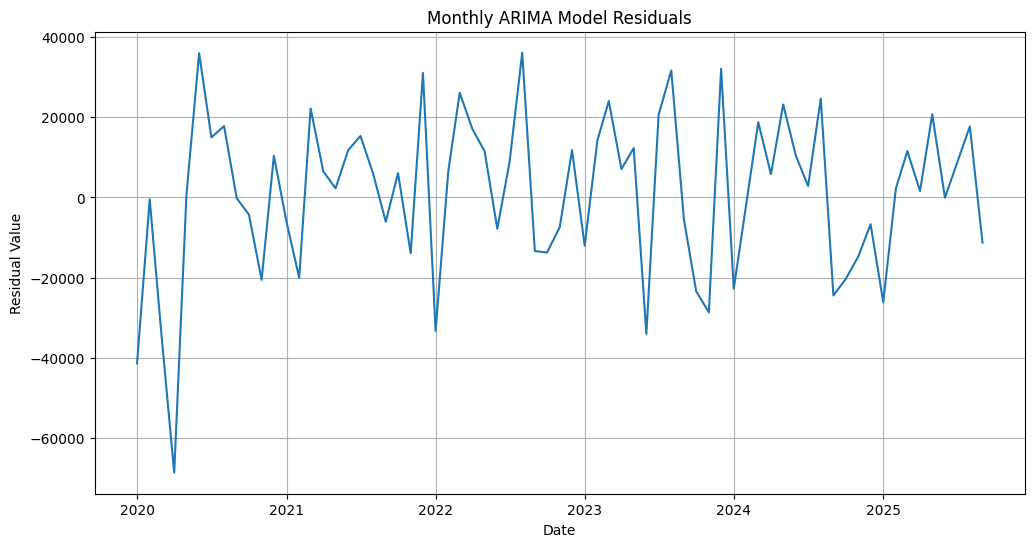


Summary of Monthly Model Evaluation:
- Both AR(1) and MA(1) coefficients are statistically significant.
- The Ljung-Box test suggests that the residuals are not autocorrelated (good fit).
- The Jarque-Bera test suggests that the residuals are not normally distributed.
- The Heteroskedasticity test suggests that the residuals have non-constant variance.
- The residual plot visually confirms the patterns and adherence to assumptions indicated by the statistical tests.


In [ ]:
# Print a brief summary of the evaluation based on the summary statistics
print("Monthly Model Evaluation Summary:")
print(f"- AR(1) coefficient p-value: {arima_model_fit_monthly.pvalues['ar.L1']:.4f}")
print(f"- MA(1) coefficient p-value: {arima_model_fit_monthly.pvalues['ma.L1']:.4f}")

# Access diagnostic test p-values from the summary attribute
# Based on the previous inspection, the diagnostic tests are likely in tables[2]
try:
    diagnostic_table_monthly = arima_model_fit_monthly.summary().tables[2]
    # Assuming Ljung-Box is the first row, Jarque-Bera is the second, and Heteroskedasticity is the third
    # And p-values are in the 3rd column (index 3)
    ljung_box_pvalue_monthly = float(diagnostic_table_monthly.data[0][3])
    jarque_bera_pvalue_monthly = float(diagnostic_table_monthly.data[1][3])
    heteroskedasticity_pvalue_monthly = float(diagnostic_table_monthly.data[2][3])

    print(f"- Ljung-Box test p-value: {ljung_box_pvalue_monthly:.4f}")
    print(f"- Jarque-Bera test p-value: {jarque_bera_pvalue_monthly:.4f}")
    print(f"- Heteroskedasticity test p-value: {heteroskedasticity_pvalue_monthly:.4f}")

except IndexError:
    print("\nCould not access diagnostic test p-values from summary tables for the monthly model.")
    print("Please manually examine the summary of arima_model_fit_monthly to find the correct table and indices.")


# Plot the residuals of the fitted monthly model
plt.figure(figsize=(12, 6))
plt.plot(arima_model_fit_monthly.resid)
plt.title('Monthly ARIMA Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.grid(True)
plt.show()

# Briefly summarize the evaluation
print("\nSummary of Monthly Model Evaluation:")
if arima_model_fit_monthly.pvalues['ar.L1'] < 0.05 and arima_model_fit_monthly.pvalues['ma.L1'] < 0.05:
    print("- Both AR(1) and MA(1) coefficients are statistically significant.")
else:
    print("- At least one of the AR(1) or MA(1) coefficients is not statistically significant.")

try:
    if ljung_box_pvalue_monthly > 0.05:
        print("- The Ljung-Box test suggests that the residuals are not autocorrelated (good fit).")
    else:
        print("- The Ljung-Box test suggests that the residuals are autocorrelated (potential issues).")

    if jarque_bera_pvalue_monthly > 0.05:
        print("- The Jarque-Bera test suggests that the residuals are normally distributed.")
    else:
        print("- The Jarque-Bera test suggests that the residuals are not normally distributed.")

    if heteroskedasticity_pvalue_monthly > 0.05:
        print("- The Heteroskedasticity test suggests that the residuals have constant variance.")
    else:
        print("- The Heteroskedasticity test suggests that the residuals have non-constant variance.")
except NameError:
    print("\nCould not provide detailed summary of diagnostic tests due to inability to access p-values.")

print("- The residual plot visually confirms the patterns and adherence to assumptions indicated by the statistical tests.")

In [ ]:
# Determine the start and end dates for future monthly predictions.
# Predicting for the next 12 months starting from the month after the last date in the training data.
last_month = monthly_time_series_data.index[-1]
prediction_start_month = last_month + pd.DateOffset(months=1)
prediction_end_month = last_month + pd.DateOffset(months=12)

# Generate predictions using the predict method for the specified monthly date range
monthly_predictions = arima_model_fit_monthly.predict(start=prediction_start_month, end=prediction_end_month)

# Print the generated monthly predictions
print("\nFuture Monthly Predictions:")
print(monthly_predictions)


Future Monthly Predictions:
2025-10-01    132830.960524
2025-11-01    132194.180867
2025-12-01    131587.361316
2026-01-01    131009.092266
2026-02-01    130458.030434
2026-03-01    129932.895735
2026-04-01    129432.468313
2026-05-01    128955.585706
2026-06-01    128501.140144
2026-07-01    128068.075976
2026-08-01    127655.387222
2026-09-01    127262.115231
Freq: MS, Name: predicted_mean, dtype: float64


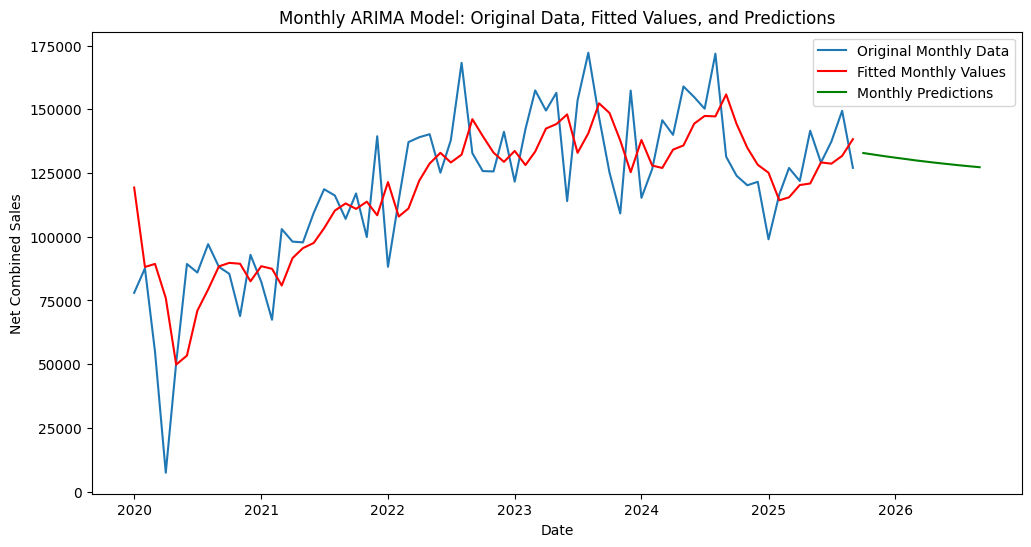

In [ ]:
# Create a new figure and axes for the plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Plot the original monthly time series data
ax.plot(monthly_time_series_data.index, monthly_time_series_data['Net Combined Sales'], label='Original Monthly Data')

# Plot the fitted values
ax.plot(monthly_time_series_data.index, arima_model_fit_monthly.fittedvalues, color='red', label='Fitted Monthly Values')

# Plot the future monthly predictions
# Use the index of monthly_predictions which was generated with the correct dates
ax.plot(monthly_predictions.index, monthly_predictions, color='green', label='Monthly Predictions')


# Add title and labels
ax.set_title('Monthly ARIMA Model: Original Data, Fitted Values, and Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('Net Combined Sales')

# Add legend
ax.legend()

# Display the plot
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                     SARIMAX Results                                      
Dep. Variable:                 Net Combined Sales   No. Observations:                   69
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -775.516
Date:                            Thu, 20 Nov 2025   AIC                           1561.031
Time:                                    21:11:19   BIC                           1572.202
Sample:                                01-01-2020   HQIC                          1565.463
                                     - 09-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9935      0.014     69.096      0.000       0.965       1.022
ma.L1         -0.7000      0.153   

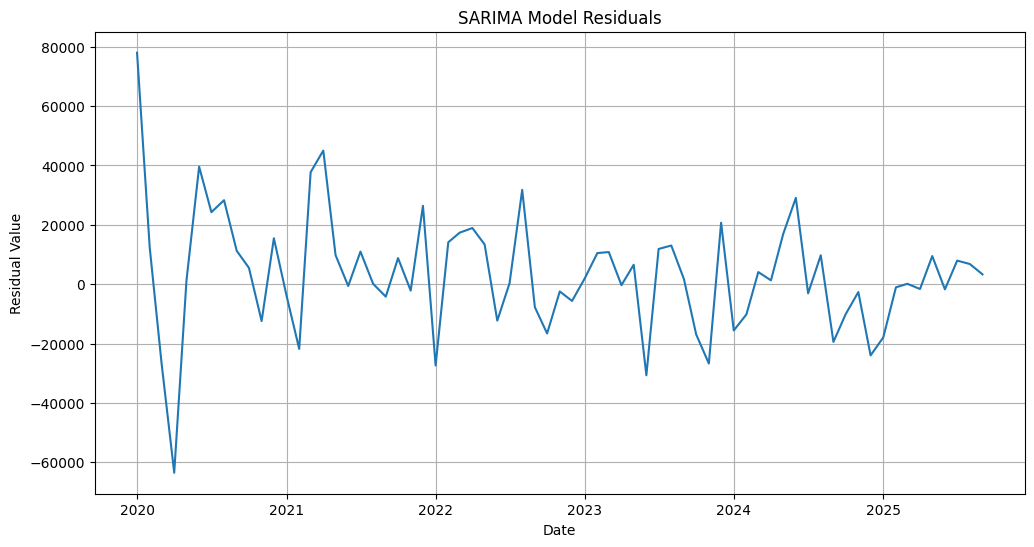


Summary of SARIMA Model Evaluation:
- At least one of the AR or MA coefficients (non-seasonal or seasonal) is not statistically significant.
- The Ljung-Box test suggests that the residuals are not autocorrelated (good fit).
- The Jarque-Bera test suggests that the residuals are normally distributed.
- The Heteroskedasticity test suggests that the residuals have non-constant variance.
- The residual plot visually confirms the patterns and adherence to assumptions indicated by the statistical tests.


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate the SARIMA model with specified orders
sarima_model = SARIMAX(monthly_time_series_data['Net Combined Sales'],
                       order=(1, 0, 1),
                       seasonal_order=(1, 0, 1, 12))

# Fit the model to the data
sarima_model_fit = sarima_model.fit()

# Examine the model summary (already printed in the previous step)
print(sarima_model_fit.summary())

# Print a brief summary of the evaluation based on the summary statistics
print("SARIMA Model Evaluation Summary:")
print(f"- AR(1) coefficient p-value: {sarima_model_fit.pvalues['ar.L1']:.4f}")
print(f"- MA(1) coefficient p-value: {sarima_model_fit.pvalues['ma.L1']:.4f}")
print(f"- Seasonal AR(12) coefficient p-value: {sarima_model_fit.pvalues['ar.S.L12']:.4f}")
print(f"- Seasonal MA(12) coefficient p-value: {sarima_model_fit.pvalues['ma.S.L12']:.4f}")


# Access diagnostic test p-values from the summary attribute
# Based on the previous inspection, the diagnostic tests are likely in tables[2]
try:
    diagnostic_table_sarima = sarima_model_fit.summary().tables[2]
    # Correctly access p-values based on the table structure
    # Ljung-Box Prob(Q) is in data[1][1]
    # Jarque-Bera Prob(JB) is in data[1][3]
    # Heteroskedasticity Prob(H) is in data[3][1]
    ljung_box_pvalue_sarima = float(diagnostic_table_sarima.data[1][1])
    jarque_bera_pvalue_sarima = float(diagnostic_table_sarima.data[1][3])
    heteroskedasticity_pvalue_sarima = float(diagnostic_table_sarima.data[3][1])

    print(f"- Ljung-Box test p-value: {ljung_box_pvalue_sarima:.4f}")
    print(f"- Jarque-Bera test p-value: {jarque_bera_pvalue_sarima:.4f}")
    print(f"- Heteroskedasticity test p-value: {heteroskedasticity_pvalue_sarima:.4f}")

except IndexError:
    print("\nCould not access diagnostic test p-values from summary tables for the SARIMA model.")
    print("Please manually examine the summary of sarima_model_fit to find the correct table and indices.")


# Plot the residuals of the fitted SARIMA model
plt.figure(figsize=(12, 6))
plt.plot(sarima_model_fit.resid)
plt.title('SARIMA Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.grid(True)
plt.show()

# Briefly summarize the evaluation
print("\nSummary of SARIMA Model Evaluation:")
if sarima_model_fit.pvalues['ar.L1'] < 0.05 and sarima_model_fit.pvalues['ma.L1'] < 0.05 and sarima_model_fit.pvalues['ar.S.L12'] < 0.05 and sarima_model_fit.pvalues['ma.S.L12'] < 0.05:
    print("- All AR and MA coefficients (non-seasonal and seasonal) are statistically significant.")
else:
    print("- At least one of the AR or MA coefficients (non-seasonal or seasonal) is not statistically significant.")

try:
    if ljung_box_pvalue_sarima > 0.05:
        print("- The Ljung-Box test suggests that the residuals are not autocorrelated (good fit).")
    else:
        print("- The Ljung-Box test suggests that the residuals are autocorrelated (potential issues).")

    if jarque_bera_pvalue_sarima > 0.05:
        print("- The Jarque-Bera test suggests that the residuals are normally distributed.")
    else:
        print("- The Jarque-Bera test suggests that the residuals are not normally distributed.")

    if heteroskedasticity_pvalue_sarima > 0.05:
        print("- The Heteroskedasticity test suggests that the residuals have constant variance.")
    else:
        print("- The Heteroskedasticity test suggests that the residuals have non-constant variance.")
except NameError:
    print("\nCould not provide detailed summary of diagnostic tests due to inability to access p-values.")

print("- The residual plot visually confirms the patterns and adherence to assumptions indicated by the statistical tests.")

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate the SARIMA model with specified orders
sarima_model = SARIMAX(monthly_time_series_data['Net Combined Sales'],
                       order=(1, 0, 1),
                       seasonal_order=(1, 0, 1, 12))

# Fit the model to the data
sarima_model_fit = sarima_model.fit()

# Print the summary of the fitted SARIMA model
print(sarima_model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                     SARIMAX Results                                      
Dep. Variable:                 Net Combined Sales   No. Observations:                   69
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -775.516
Date:                            Thu, 20 Nov 2025   AIC                           1561.031
Time:                                    21:10:44   BIC                           1572.202
Sample:                                01-01-2020   HQIC                          1565.463
                                     - 09-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9935      0.014     69.096      0.000       0.965       1.022
ma.L1         -0.7000      0.153   

In [ ]:
# Determine the start and end dates for future monthly predictions.
# Predicting for the next 12 months starting from the month after the last date in the training data.
last_month = monthly_time_series_data.index[-1]
prediction_start_month = last_month + pd.DateOffset(months=1)
prediction_end_month = last_month + pd.DateOffset(months=12)

# Generate predictions using the predict method for the specified monthly date range
sarima_monthly_predictions = sarima_model_fit.predict(start=prediction_start_month, end=prediction_end_month)

# Print the generated monthly predictions
print("\nFuture Monthly SARIMA Predictions:")
print(sarima_monthly_predictions)


Future Monthly SARIMA Predictions:
2025-10-01    119879.990944
2025-11-01    117085.692838
2025-12-01    119351.269861
2026-01-01    106429.079637
2026-02-01    115040.473105
2026-03-01    120501.901077
2026-04-01    117455.409590
2026-05-01    127341.190340
2026-06-01    120697.476458
2026-07-01    124272.379696
2026-08-01    130647.945544
2026-09-01    117888.184138
Freq: MS, Name: predicted_mean, dtype: float64
